<a href="https://colab.research.google.com/github/ashref83/First/blob/branc1/lendingClubIntrst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

steps to use google drive

Google drive file

In [0]:
link = 'https://drive.google.com/file/d/1H0fiIfVlej2rtpBRQO3GF_b-oR4XVMNu/view?usp=sharing'

#fluff, id = link.split('=')

id = '1H0fiIfVlej2rtpBRQO3GF_b-oR4XVMNu'

In [0]:
downloaded = drive.CreateFile({'id':id}) 

In [0]:
downloaded.GetContentFile('34_1110834_compressed_loan.csv.zip') 

In [0]:
ls

34_1110834_compressed_loan.csv.zip  adc.json  sample_data/


In [0]:
!unzip 34_1110834_compressed_loan.csv.zip -d lending

Archive:  34_1110834_compressed_loan.csv.zip
  inflating: lending/loan.csv        


In [0]:
ls lending/

loan.csv


This is First attempt to analyse lending club my own way

I am tryin to study following things

1.   Distrubution of loan according to FICCO Score

1.  Does Giving loan to low ficco score make more profit comparing with high ficco and charged off
2.   Profit ratio accordin to FICCO Score.

5. Check multiple loan taking from same customer -repayment patter and FICCO score chage

1.   Charged off and closed loan ratio


In [0]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df = pd.read_csv('lending/loan.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (19,47,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260668 entries, 0 to 2260667
Columns: 145 entries, id to settlement_term
dtypes: float64(105), int64(4), object(36)
memory usage: 2.4+ GB


In [0]:
pd.set_option('max_info_columns',1000) #option to display all columns

In [0]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260668 entries, 0 to 2260667
Data columns (total 145 columns):
 #   Column                                      Dtype  
---  ------                                      -----  
 0   id                                          float64
 1   member_id                                   float64
 2   loan_amnt                                   int64  
 3   funded_amnt                                 int64  
 4   funded_amnt_inv                             float64
 5   term                                        object 
 6   int_rate                                    float64
 7   installment                                 float64
 8   grade                                       object 
 9   sub_grade                                   object 
 10  emp_title                                   object 
 11  emp_length                                  object 
 12  home_ownership                              object 
 13  annual_inc                

In [0]:
df.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,Chef,10+ years,RENT,55000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,109xx,NY,18.24,0.0,Apr-2001,1.0,NaN,45.0,9.0,1.0,4341,10.3,34.0,w,2386.02,2386.02,167.02,167.02,...,1.0,0.0,60124.0,16901.0,36500.0,18124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,Postmaster,10+ years,MORTGAGE,90000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,713xx,LA,26.52,0.0,Jun-1987,0.0,71.0,75.0,13.0,1.0,12315,24.2,44.0,w,29387.75,29387.75,1507.11,1507.11,...,1.0,0.0,372872.0,99468.0,15000.0,94072.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
data= df[list(set('loan_amnt 	term 	int_rate 	installment 	grade 	sub_grade 	emp_title 	emp_length 	home_ownership 	home_ownership annual_inc 	verification_status 	issue_d last_pymnt_d settlement_date 	loan_status purpose 	title 	zip_code 	addr_state 	dti open_acc 	pub_rec 	revol_bal 	revol_util 	total_acc 	initial_list_status 	out_prncp 	total_pymnt last_pymnt_amnt    tot_cur_bal       settlement_amount  tot_coll_amt total_pymnt  total_rec_int  total_rec_late_fee  total_rec_prncp   total_rec_late_fee       collection_recovery_fee   '.split())) ]

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260668 entries, 0 to 2260667
Data columns (total 36 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   annual_inc               float64
 1   emp_length               object 
 2   zip_code                 object 
 3   addr_state               object 
 4   total_rec_int            float64
 5   issue_d                  object 
 6   last_pymnt_d             object 
 7   installment              float64
 8   home_ownership           object 
 9   title                    object 
 10  revol_bal                int64  
 11  loan_status              object 
 12  total_pymnt              float64
 13  total_acc                float64
 14  int_rate                 float64
 15  tot_cur_bal              float64
 16  tot_coll_amt             float64
 17  emp_title                object 
 18  loan_amnt                int64  
 19  pub_rec                  float64
 20  total_rec_late_fee       float64
 21  grade   

Group the loan amount to multiple of 5000 and study about relation in charged off and percentage of profit study about multiple small loans or one bigloan is more profitable 

In [0]:
pd.set_option('display.max_columns', None) #Show all columns

In [0]:
df.head(2)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,Chef,10+ years,RENT,55000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,109xx,NY,18.24,0.0,Apr-2001,1.0,NaN,45.0,9.0,1.0,4341,10.3,34.0,w,2386.02,2386.02,167.02,167.02,113.98,53.04,0.0,0.0,0.0,Feb-2019,84.92,Mar-2019,Feb-2019,0.0,NaN,1,Individual,NaN,NaN,NaN,0.0,0.0,16901.0,2.0,2.0,1.0,2.0,2.0,12560.0,69.0,2.0,7.0,2137.0,28.0,42000.0,1.0,11.0,2.0,9.0,1878.0,34360.0,5.9,0.0,0.0,140.0,212.0,1.0,1.0,0.0,1.0,NaN,2.0,NaN,0.0,2.0,5.0,3.0,3.0,16.0,7.0,18.0,5.0,9.0,0.0,0.0,0.0,3.0,100.0,0.0,1.0,0.0,60124.0,16901.0,36500.0,18124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,Postmaster,10+ years,MORTGAGE,90000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,713xx,LA,26.52,0.0,Jun-1987,0.0,71.0,75.0,13.0,1.0,12315,24.2,44.0,w,29387.75,29387.75,1507.11,1507.11,612.25,894.86,0.0,0.0,0.0,Feb-2019,777.23,Mar-2019,Feb-2019,0.0,NaN,1,Individual,NaN,NaN,NaN,0.0,1208.0,321915.0,4.0,4.0,2.0,3.0,3.0,87153.0,88.0,4.0,5.0,998.0,57.0,50800.0,2.0,15.0,2.0,10.0,24763.0,13761.0,8.3,0.0,0.0,163.0,378.0,4.0,3.0,3.0,4.0,NaN,4.0,NaN,0.0,2.0,4.0,4.0,9.0,27.0,8.0,14.0,4.0,13.0,0.0,0.0,0.0,6.0,95.0,0.0,1.0,0.0,372872.0,99468.0,15000.0,94072.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
data.describe()

,annual_inc,total_rec_int,installment,revol_bal,total_pymnt,total_acc,int_rate,tot_cur_bal,tot_coll_amt,loan_amnt,pub_rec,total_rec_late_fee,settlement_amount,total_rec_prncp,dti,out_prncp,open_acc,revol_util,last_pymnt_amnt,collection_recovery_fee
count,2.260664e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260639e+06,2.260668e+06,2.190392e+06,2.190392e+06,2.260668e+06,2.260639e+06,2.260668e+06,33056.000000,2.260668e+06,2.258957e+06,2.260668e+06,2.260639e+06,2.258866e+06,2.260668e+06,2.260668e+06
mean,7.799243e+04,2.386352e+03,4.458076e+02,1.665846e+04,1.182403e+04,2.416255e+01,1.309291e+01,1.424922e+05,2.327317e+02,1.504693e+04,1.975278e-01,1.462469e+00,5030.606922,9.300142e+03,1.882420e+01,4.446293e+03,1.161240e+01,5.033770e+01,3.364015e+03,2.259328e+01
std,1.126962e+05,2.663086e+03,2.671737e+02,2.294831e+04,9.889599e+03,1.198753e+01,4.832114e+00,1.606926e+05,8.518462e+03,9.190245e+03,5.705150e-01,1.150210e+01,3692.027842,8.304886e+03,1.418333e+01,7.547612e+03,5.640861e+00,2.471307e+01,5.971757e+03,1.271114e+02
min,0.000000e+00,0.000000e+00,4.930000e+00,0.000000e+00,0.000000e+00,1.000000e+00,5.310000e+00,0.000000e+00,0.000000e+00,5.000000e+02,0.000000e+00,-9.500000e-09,44.210000,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.600000e+04,6.936100e+02,2.516500e+02,5.950000e+03,4.272580e+03,1.500000e+01,9.490000e+00,2.909200e+04,0.000000e+00,8.000000e+03,0.000000e+00,0.000000e+00,2227.000000,2.846180e+03,1.189000e+01,0.000000e+00,8.000000e+00,3.150000e+01,3.086400e+02,0.000000e+00
50%,6.500000e+04,1.485280e+03,3.779900e+02,1.132400e+04,9.060870e+03,2.200000e+01,1.262000e+01,7.924000e+04,0.000000e+00,1.290000e+04,0.000000e+00,0.000000e+00,4172.855000,6.823385e+03,1.784000e+01,0.000000e+00,1.100000e+01,5.030000e+01,5.884700e+02,0.000000e+00
75%,9.300000e+04,3.052220e+03,5.933200e+02,2.024600e+04,1.670797e+04,3.100000e+01,1.599000e+01,2.132040e+05,0.000000e+00,2.000000e+04,0.000000e+00,0.000000e+00,6870.782500,1.339750e+04,2.449000e+01,6.712632e+03,1.400000e+01,6.940000e+01,3.534965e+03,0.000000e+00
max,1.100000e+08,2.819250e+04,1.719830e+03,2.904836e+06,6.329688e+04,1.760000e+02,3.099000e+01,9.971659e+06,9.152545e+06,4.000000e+04,8.600000e+01,1.427250e+03,33601.000000,4.000000e+04,9.990000e+02,4.000000e+04,1.010000e+02,8.923000e+02,4.219205e+04,7.174719e+03


In [0]:
data[['loan_amnt_group','loan_amnt']]

,loan_amnt_group,loan_amnt
0,below 5000,2500
1,25001to30000,30000
2,below 5000,5000
3,below 5000,4000
4,25001to30000,30000
...,...,...
2260663,10001to15000,12000
2260664,10001to15000,12000
2260665,5001to10000,10000
2260666,10001to15000,12000


In [0]:
type(data['loan_amnt_group'][1])

str

counter plot with loan status

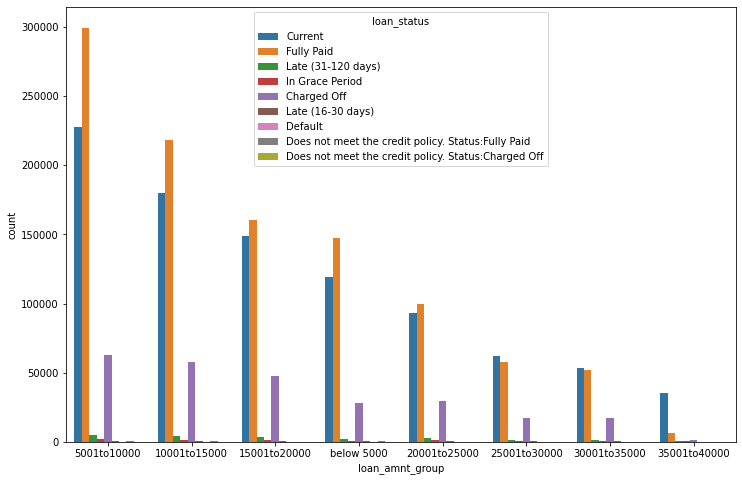

In [0]:
plt.figure(figsize=(12,8))
sns.countplot(data['loan_amnt_group'],order=data['loan_amnt_group'].value_counts().index,hue=data['loan_status'])

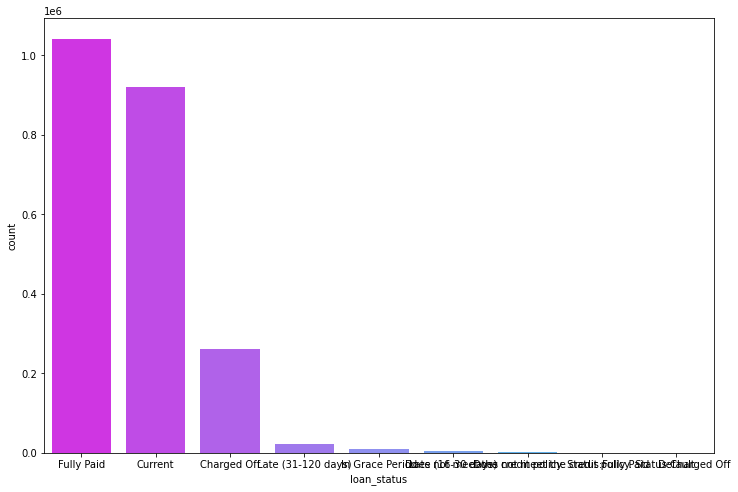

In [0]:
plt.figure(figsize=(12,8))
sns.countplot(data['loan_status'],order=data['loan_status'].value_counts().index,palette='cool_r')

In [0]:
data=data[data['loan_status'].apply(lambda x: True if x in ['Fully Paid','Current','Charged Off'] else False)]

NameError: ignored

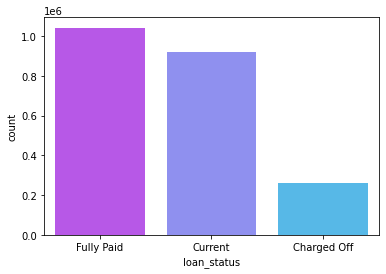

In [0]:

sns.countplot(data['loan_status'],order=data['loan_status'].value_counts().index,palette='cool_r')

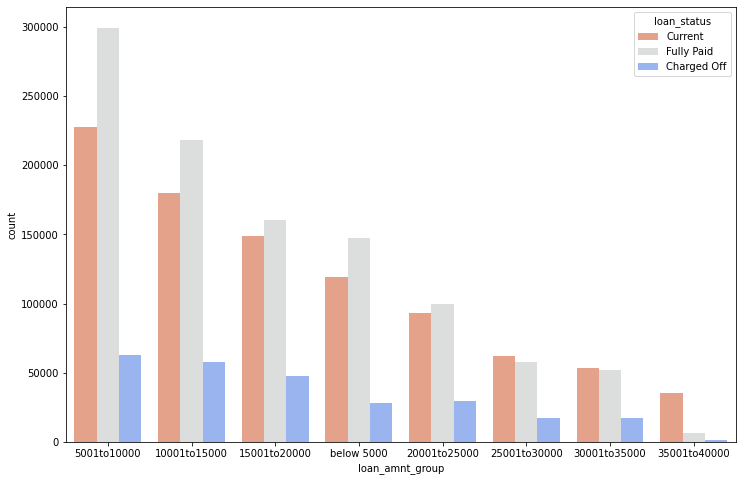

In [0]:
plt.figure(figsize=(12,8))
sns.countplot(data['loan_amnt_group'],order=data['loan_amnt_group'].value_counts().index,hue=data['loan_status'],palette='coolwarm_r')

Find out the total payment receipt for each loan groups

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2223302 entries, 0 to 2260667
Data columns (total 37 columns):
 #   Column                   Dtype   
---  ------                   -----   
 0   annual_inc               float64 
 1   emp_length               object  
 2   zip_code                 object  
 3   addr_state               object  
 4   total_rec_int            float64 
 5   issue_d                  object  
 6   last_pymnt_d             object  
 7   installment              float64 
 8   home_ownership           object  
 9   title                    object  
 10  revol_bal                int64   
 11  loan_status              object  
 12  total_pymnt              float64 
 13  total_acc                float64 
 14  int_rate                 float64 
 15  tot_cur_bal              float64 
 16  tot_coll_amt             float64 
 17  emp_title                object  
 18  loan_amnt                int64   
 19  pub_rec                  float64 
 20  total_rec_late_fee      

In [0]:
#import pdb
def before2018(x):
 # pdb.set_trace()
  if type(x)!=type('-'):
    return False
  if(int(x.split('-')[1])<2018):
    return True

  return False  


In [0]:

pd.set_option('display.max_rows', 500) #show more rows

Compare profit and lose with loan groups

In [0]:
data= df[df['loan_status'].apply(lambda x:x=='Charged Off' or x=='Fully Paid')][['loan_status','loan_amnt','int_rate','total_pymnt','issue_d','last_pymnt_d',]]

In [0]:
data['loan_amnt_group'] = pd.cut(data['loan_amnt'],
                                 [0,5000,10000,15000,20000,25000,30000,35000,40000],
                                 labels=['below 5000','5001to10000','10001to15000','15001to20000','20001to25000',
                                         '25001to30000','30001to35000','35001to40000']) #grouped as per the loan amount

In [0]:
data

,loan_status,loan_amnt,int_rate,total_pymnt,issue_d,last_pymnt_d,loan_amnt_group
100,Fully Paid,30000,22.35,30026.442500,Dec-2018,Jan-2019,25001to30000
152,Fully Paid,40000,16.14,40856.678960,Dec-2018,Feb-2019,35001to40000
170,Fully Paid,20000,7.56,20215.792430,Dec-2018,Feb-2019,15001to20000
186,Fully Paid,4500,11.31,4549.217149,Dec-2018,Feb-2019,below 5000
215,Fully Paid,8425,27.27,8735.148975,Dec-2018,Feb-2019,5001to10000
...,...,...,...,...,...,...,...
2260654,Charged Off,30000,17.09,6047.460000,Oct-2017,Jun-2018,25001to30000
2260655,Charged Off,18000,30.65,5393.400000,Oct-2017,Aug-2018,15001to20000
2260656,Fully Paid,17950,30.17,20803.775467,Oct-2017,Apr-2018,15001to20000
2260658,Fully Paid,15000,16.02,16112.317714,Oct-2017,Mar-2018,10001to15000


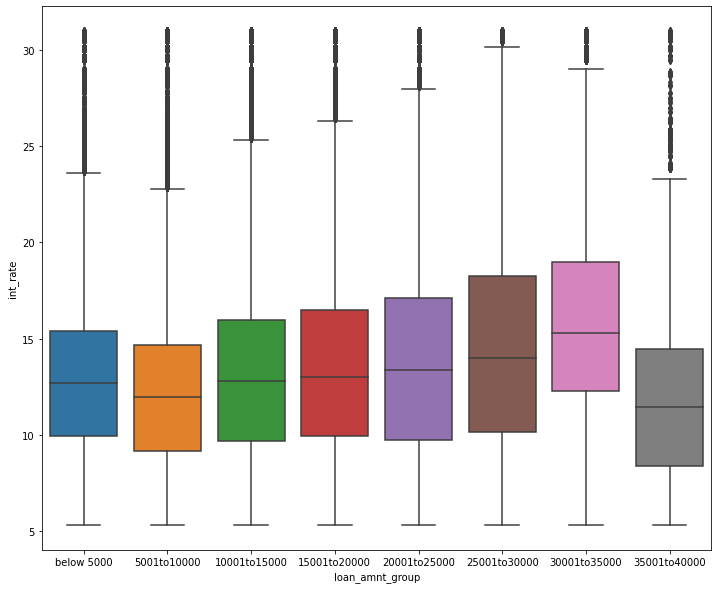

In [0]:
plt.figure(figsize=(12,10))
sns.boxplot(x='loan_amnt_group',y='int_rate',data=data)

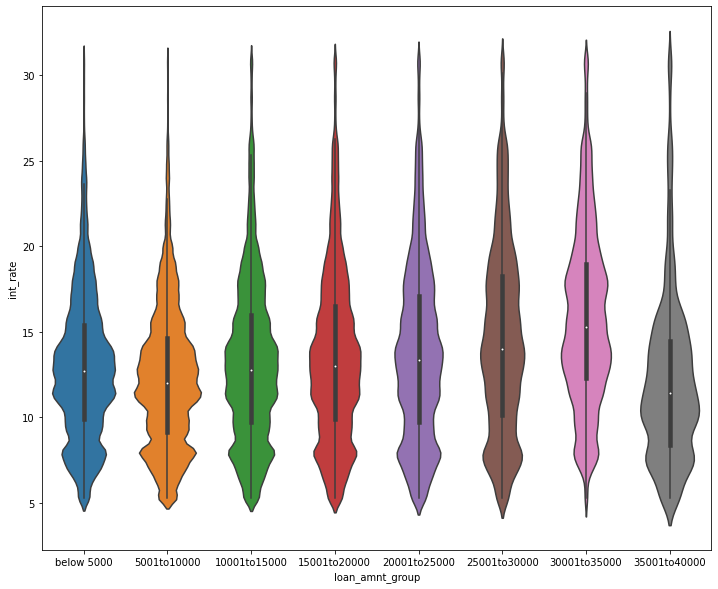

In [0]:
plt.figure(figsize=(12,10))
sns.violinplot(x='loan_amnt_group',y='int_rate',data=data)

From this graphs we can see loan in between 30000, and 35000 gettin more interest and 35000 and 40000 ettin less interest

In [0]:
meanrp= data.groupby('loan_amnt_group').mean()


,loan_amnt_group,loan_amnt,int_rate,total_pymnt
0,below 5000,3658.255025,12.947209,3817.183510
1,5001to10000,8103.667982,12.325634,8411.594693
2,10001to15000,13007.722760,13.230596,13378.406182
3,15001to20000,18140.339849,13.556220,18533.711105
4,20001to25000,23251.906275,13.799484,23836.626420
5,25001to30000,28464.171380,14.577298,29171.516705
6,30001to35000,34228.413156,15.788253,35089.550444
7,35001to40000,39107.663910,12.176641,36298.848350


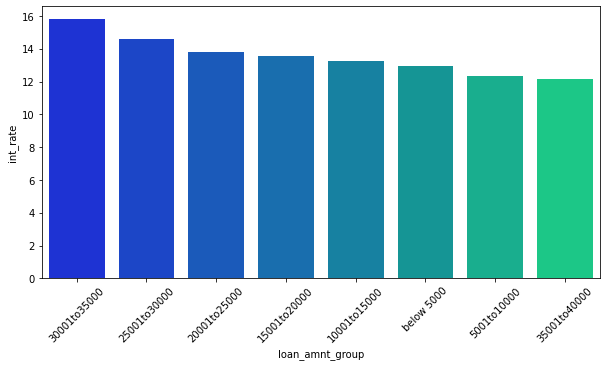

In [0]:
plt.figure(figsize=(10,5))
chart=sns.barplot(x=meanrp.index,y='int_rate',data=meanrp,
                  order=meanrp['int_rate'].sort_values(ascending=False).index,
                  palette='winter')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart

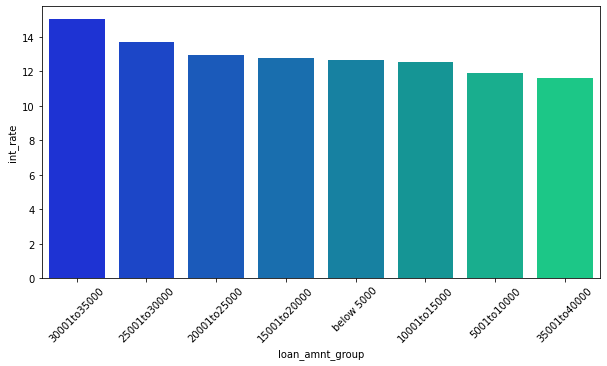

In [0]:
meanfp=data[data['loan_status']=='Fully Paid'].groupby('loan_amnt_group').mean()
plt.figure(figsize=(10,5))
chart=sns.barplot(x=meanfp.index,y='int_rate',data=meanfp,
                  order=meanfp['int_rate'].sort_values(ascending=False).index,
                  palette='winter')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart


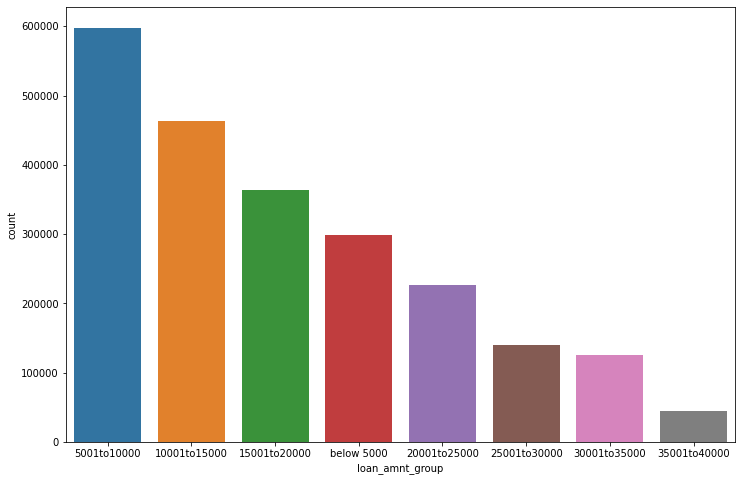

In [0]:
plt.figure(figsize=(12,8))
sns.countplot(data['loan_amnt_group'],order=data['loan_amnt_group'].value_counts().index)

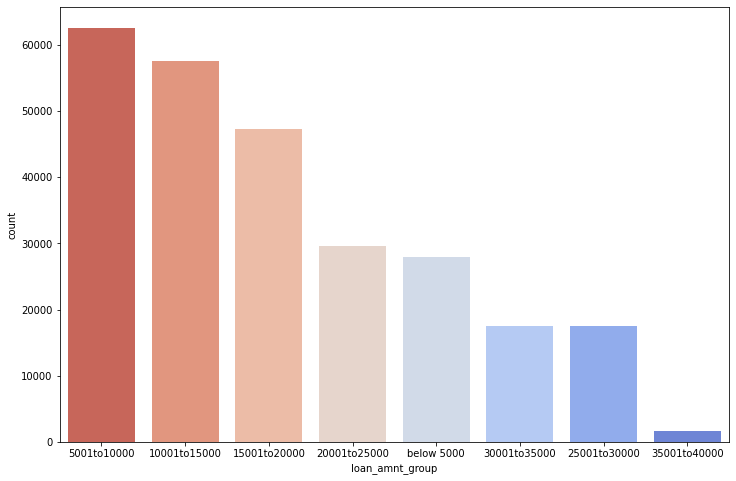

In [0]:
chrd=data[data['loan_status']=='Charged Off']
plt.figure(figsize=(12,8))
sns.countplot(chrd['loan_amnt_group'],
              order=chrd['loan_amnt_group'].value_counts().index,
              palette='coolwarm_r')